# EDA con Python

In [1]:
# Cargamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos dataset
df = pd.read_csv('../data/Titanic_Research_v6_clean.csv', sep= ';')

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0.0,0,24160,S,USA
1,1,1,"Allison, Master. Hudson Trevor",male,1,1.0,2,113781,S,CANADA
2,1,0,"Allison, Miss. Helen Loraine",female,2,1.0,2,113781,S,CANADA
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2,113781,S,CANADA
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2,113781,S,CANADA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int64  
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   embarked   1309 non-null   object 
 9   home.dest  1309 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 102.4+ KB


In [4]:
df.describe().round()

,pclass,survived,age,sibsp,parch
count,1309.0,1309.0,1309.0,1309.0,1309.0
mean,2.0,0.0,30.0,0.0,0.0
std,1.0,0.0,14.0,1.0,1.0
min,1.0,0.0,1.0,0.0,0.0
25%,2.0,0.0,21.0,0.0,0.0
50%,3.0,0.0,28.0,0.0,0.0
75%,3.0,1.0,38.0,1.0,0.0
max,3.0,1.0,80.0,8.0,9.0


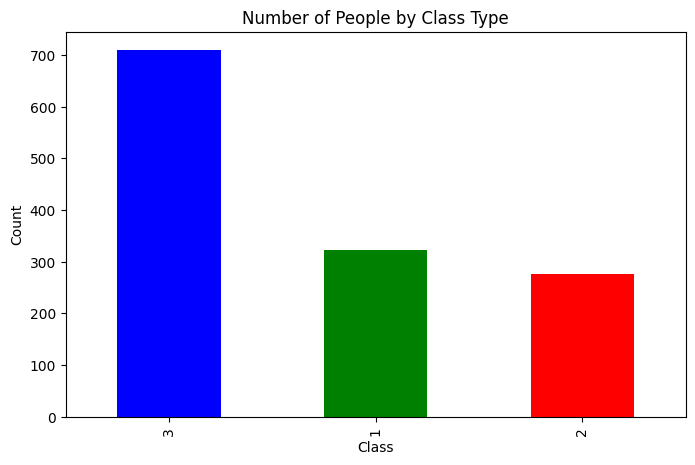

In [5]:
# ================================================
# Cantidad de personas por tipo de clase
# ================================================
plt.figure(figsize=(8, 5))
df['pclass'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Number of People by Class Type')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

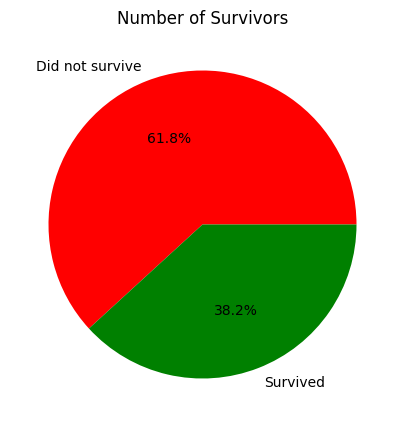

In [6]:
# ================================================
# Cantidad de sobrevivientes
# ================================================
plt.figure(figsize=(8, 5))
df['survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Did not survive', 'Survived'], colors=['red', 'green'])
plt.title('Number of Survivors')
plt.ylabel('')
plt.show()


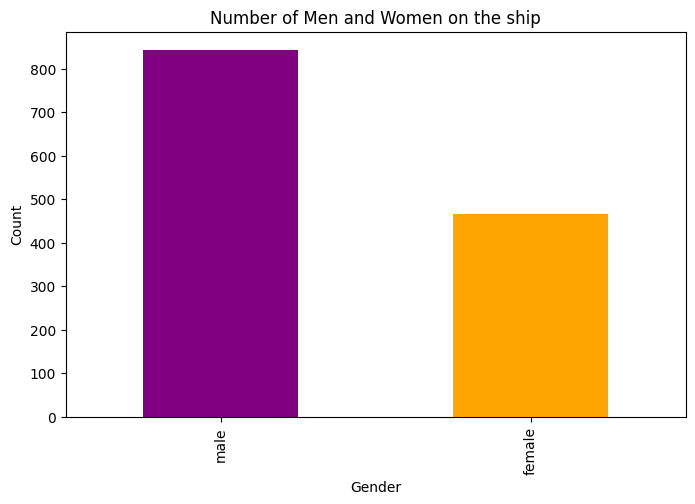

In [8]:
# ================================================
# Cantidad de hombres y mujeres en el Barco
# ================================================
plt.figure(figsize=(8, 5))
df['sex'].value_counts().plot(kind='bar', color=['purple', 'orange'])
plt.title('Number of Men and Women on the ship')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


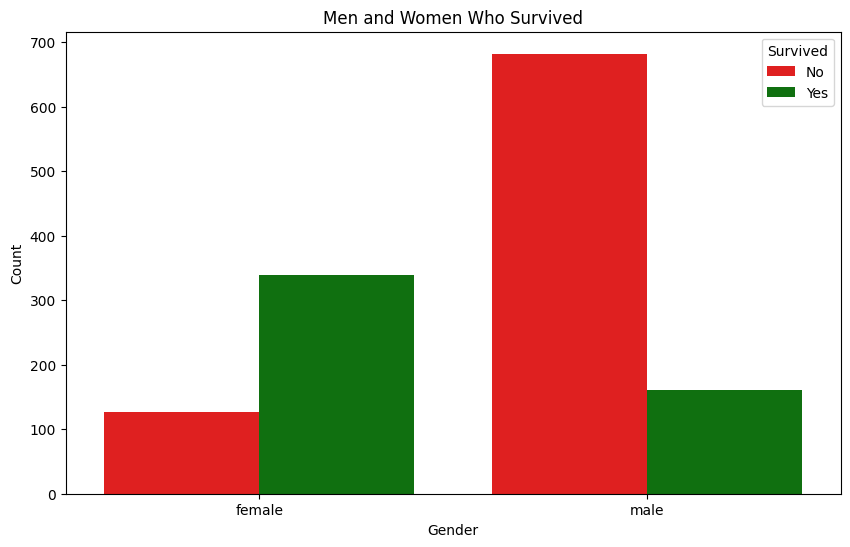

In [9]:
# ================================================
# Cantidad de hombres y mujeres que sobrevivieron
# ================================================
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='survived', palette=['red', 'green'])
plt.title('Men and Women Who Survived') 
plt.xlabel('Gender')
plt.ylabel('Count') 
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


/tmp/ipykernel_20944/3315313284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='age', palette=['purple', 'orange'])


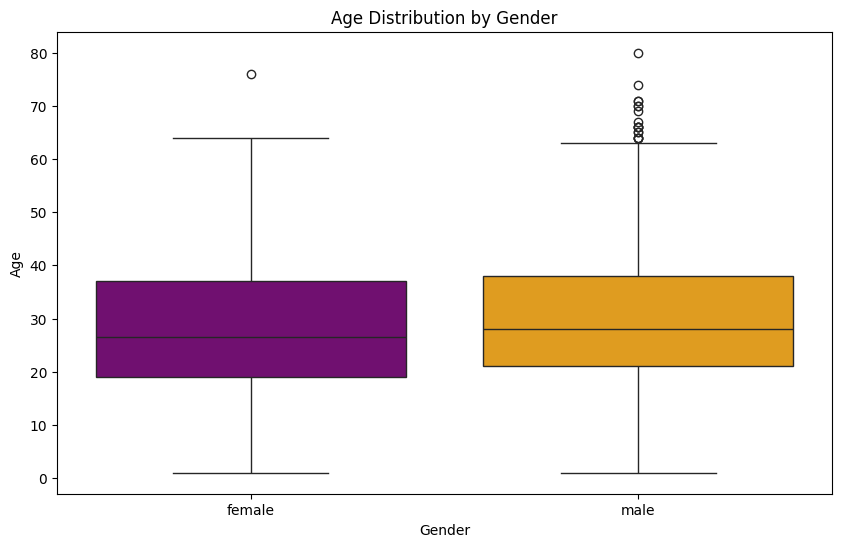

In [10]:
# ================================================
# Distribución de edades en hombres y mujeres
# ================================================
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='age', palette=['purple', 'orange'])
plt.title('Age Distribution by Gender') 
plt.xlabel('Gender')
plt.ylabel('Age')  
plt.show()


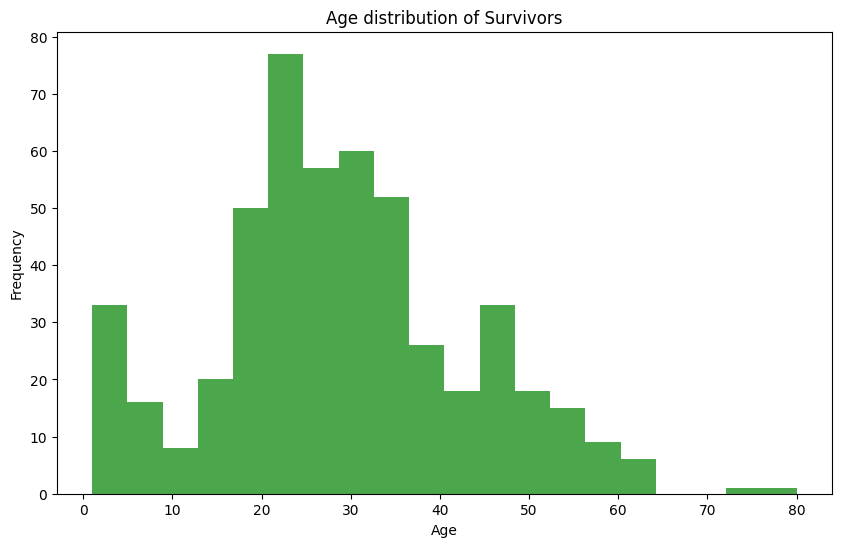

In [ ]:
# ================================================
# Distribución de edades de supervivientes
# ================================================
plt.figure(figsize=(10, 6))
df[df['survived'] == 1]['age'].plot(kind='hist', bins=20, color='green', alpha=0.7)
plt.title('Age distribution of Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


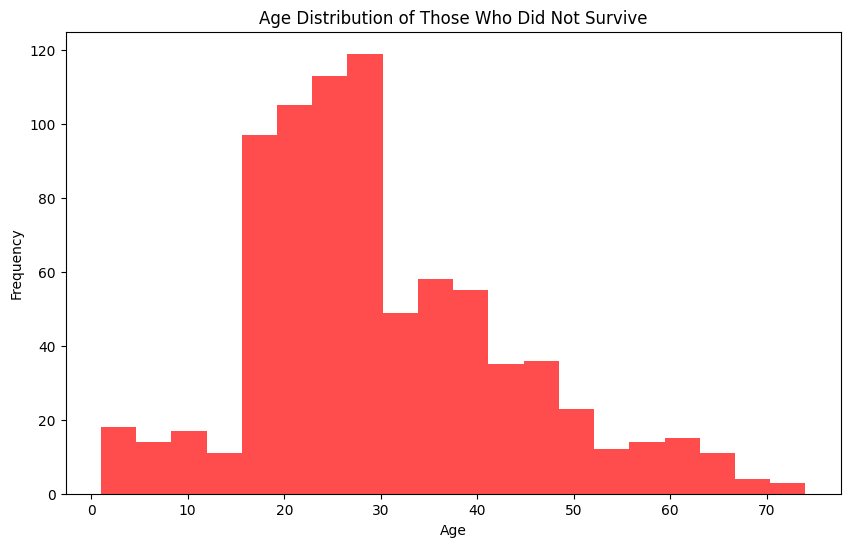

In [12]:
# ================================================
# Distribución de edades de muertos
# ================================================
plt.figure(figsize=(10, 6))
df[df['survived'] == 0]['age'].plot(kind='hist', bins=20, color='red', alpha=0.7)
plt.title('Age Distribution of Those Who Did Not Survive')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


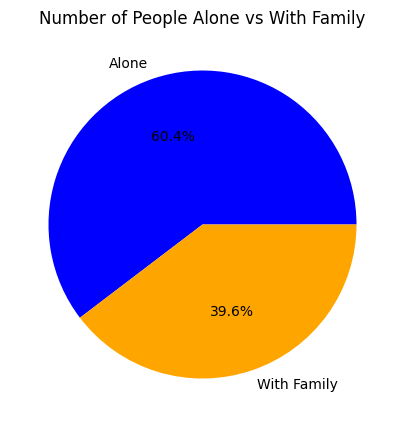

In [13]:
# ================================================
# Cantidad de familias y personas solas
# ================================================
df['family_size'] = df['sibsp'] + df['parch']
df['family_type'] = df['family_size'].apply(lambda x: 'Alone' if x == 0 else 'With Family')
plt.figure(figsize=(8, 5))
df['family_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Alone', 'With Family'], colors=['blue', 'orange'])
plt.title('Number of People Alone vs With Family')
plt.ylabel('')
plt.show()


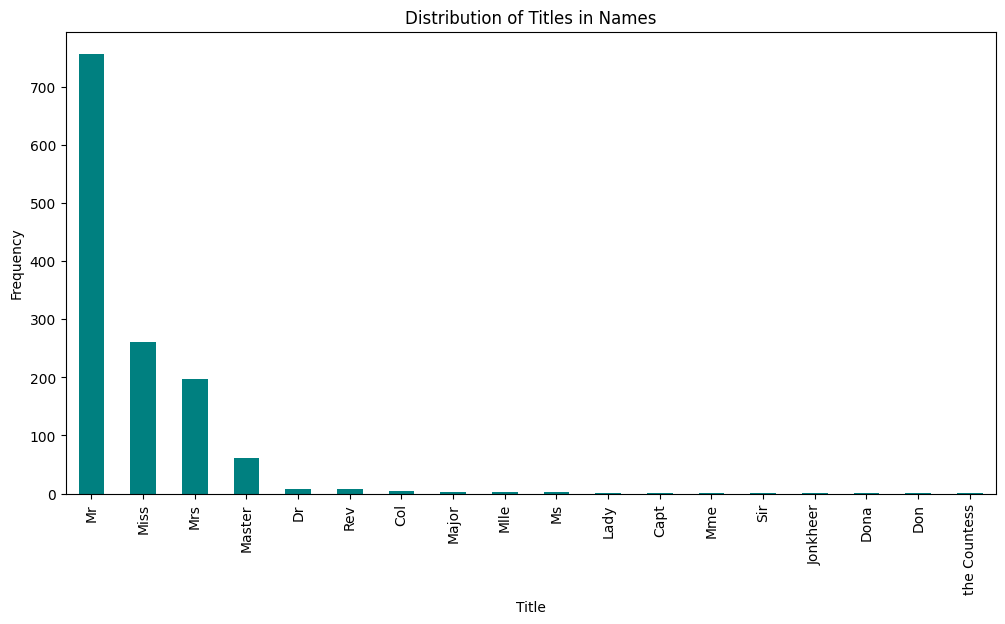

In [14]:
# ================================================
# Análisis de títulos en nombres
# ================================================
df['title'] = df['name'].str.extract(r',\s*([^\.]+)\.')
plt.figure(figsize=(12, 6))
df['title'].value_counts().plot(kind='bar', color='teal')
plt.title('Distribution of Titles in Names')
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.show()


<Figure size 1200x600 with 0 Axes>

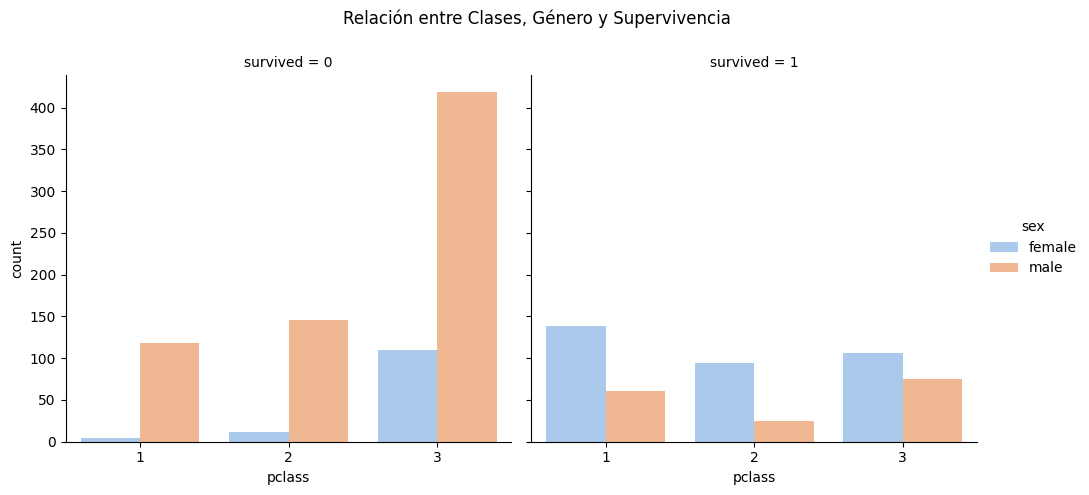

In [15]:
# ================================================
# Relación entre clases, géneros y sobrevivientes
# ================================================
plt.figure(figsize=(12, 6))
sns.catplot(data=df, x='pclass', hue='sex', col='survived', kind='count', palette='pastel', height=5, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Relación entre Clases, Género y Supervivencia')
plt.show()


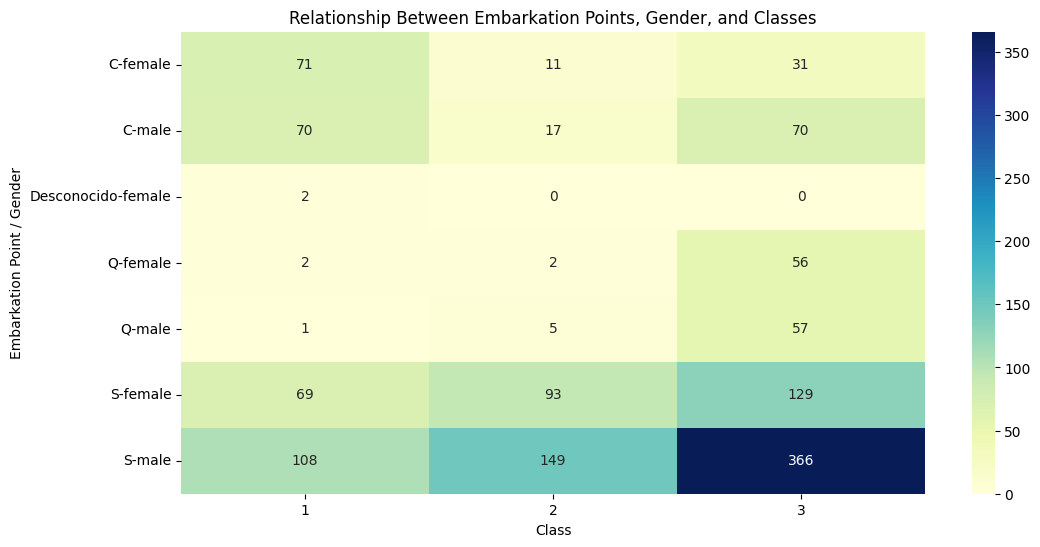

In [15]:
# ================================================
# Relación entre puntos de embarque, género y clases
# ================================================
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab([df['embarked'], df['sex']], df['pclass']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relationship Between Embarkation Points, Gender, and Classes')
plt.xlabel('Class')
plt.ylabel('Embarkation Point / Gender')
plt.show()
